In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake

2025-10-07 03:49:28.661441: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-07 03:49:28.665996: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-07 03:49:28.681100: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1759808968.707441   13914 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1759808968.715403   13914 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-07 03:49:28.744047: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
drichlet_ids = [1,2,5,6]
side_ids = []
invert_thwaites = Invert(outline = 'data/geojson/thwaites.geojson', mesh_name = 'thwaites', reg_constant_c  = 0.05, read_mesh = False,opts = None, drichlet_ids = drichlet_ids , lcar = 9e3)

Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='UPS x [m]', ylabel='UPS y [m]'>)

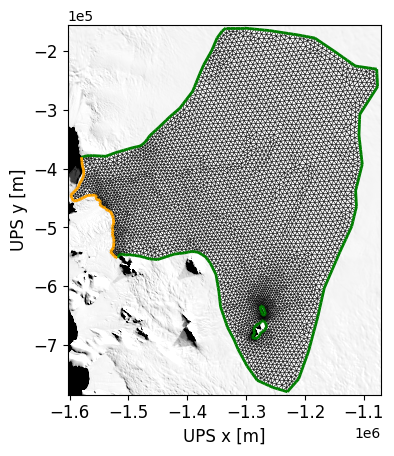

In [28]:
def plot_mesh():
    fig, axes = invert_thwaites.plot_bounded_antarctica()
    #fig, axes = plt.subplots(figsize=(12, 12))
    
    # Set x-label, y-label and their font sizes
    axes.set_xlabel("UPS x [m]", fontsize=12)  # Adjust font size for x-axis label
    axes.set_ylabel("UPS y [m]", fontsize=12)  # Adjust font size for y-axis label

    # Set tick label sizes
    axes.tick_params(axis='x', labelsize=12)  # Adjust font size for x-ticks
    axes.tick_params(axis='y', labelsize=12)  # Adjust font size for y-ticks
    
    kwargs = {
        "interior_kw": {"linewidth": 0.25},
        "boundary_kw": {"linewidth": 2},
    }
    
    firedrake.triplot(invert_thwaites.get_mesh(), axes=axes, **kwargs)
    
    # We need to define just two labels, for drichlet ids and terminus
    new_labels = ['drichlet id', 'terminus']
    new_handles = []

    # Set up the color mapping for the two labels
    drichlet_color = 'green'
    terminus_color = 'orange'
    
    # Get the existing handles and labels from the plot
    handles, labels = axes.get_legend_handles_labels()

    # Create two separate handles for drichlet_id and terminus, and set their colors
    drichlet_handle = None
    terminus_handle = None

    # Iterate over the handles and labels to find matching labels and set colors
    for handle, label in zip(handles, labels):
        if int(label) in drichlet_ids:  # Check if it's a Dirichlet boundary
            if drichlet_handle is None:
                drichlet_handle = handle
            handle.set_color(drichlet_color)
        else:  # Otherwise it's a terminus
            if terminus_handle is None:
                terminus_handle = handle
            handle.set_color(terminus_color)

    # If no handle was found for drichlet or terminus, create new ones
    if drichlet_handle is None:
        drichlet_handle = handles[0]  # Assign the first handle (adjust if needed)
        drichlet_handle.set_color(drichlet_color)
    if terminus_handle is None:
        terminus_handle = handles[1]  # Assign the second handle (adjust if needed)
        terminus_handle.set_color(terminus_color)

    # Add the updated handles with the correct color to the legend
    new_handles = [drichlet_handle, terminus_handle]
    
    # Add the legend with the two new labels and adjust font size
    #axes.legend(new_handles, new_labels, loc='best', fontsize=12)  # Set legend font size here
    
    return fig, axes


plot_mesh()

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='meters'>)

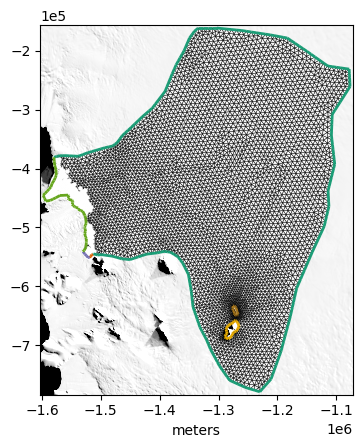

In [4]:
invert_thwaites.plot_mesh()

In [5]:
invert_thwaites.import_velocity_data(constant_val=0.01)
invert_thwaites.import_geophysics_data(name_list=['data/geophysics/ADMAP_MagneticAnomaly_5km.tif', 
                                                'data/geophysics/ANTGG_BouguerAnomaly_10km.tif', 
                                                'data/geophysics/GeothermalHeatFlux_5km.tif',
                                                'data/geophysics/ALBMAP_SurfaceAirTemperature_5km.tif',
                                                'data/geophysics/EIGEN-6C4_GravityDisturbance_10km.tif',
                                                'data/geophysics/ALBMAP_SnowAccumulation_Arthern_5km.tif',
                                                'data/geophysics/Englacial_temp_Pattyn_2013.tif'])

Reading velocity from measures database
C0 is constant: 0.01
Defining friction law
Defining friction law
using englacial temperature for rate factor
Geophysics data imported


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Englacial Temperature'}, xlabel='meters'>)

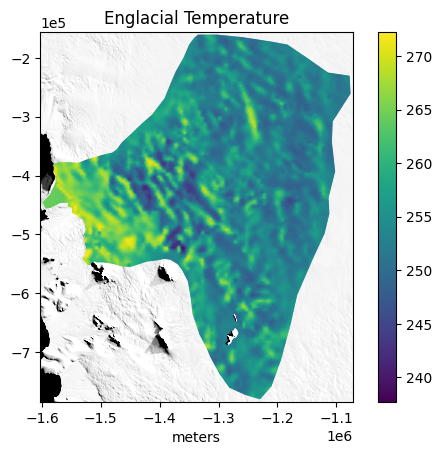

In [6]:
invert_thwaites.plot_englacial_temp()

In [7]:
invert_thwaites.invert_C(max_iterations=170, regularization_grad_fcn= True, loss_fcn_type = 'nosigma')

Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     3.304588e+08   1.652013e+04                  2.110352e+04   
  1     1.153280e+08   5.714456e+03   2.110352e+04   5.275879e+04   3         2         0         1         3         
  2     2.303636e+07   1.758717e+03   5.275879e+04   1.318970e+05   4         3         0         3         2         
  3     2.303636e+07   1.758717e+03   1.318970e+05   8.243561e+03   5         3         2         2         2         
  4     1.278033e+07   8.461049e+02   8.243561e+03   2.060890e+04   6         4         0         1         3         
  5     4.842391e+06   2.261183e+02   2.060890e+04   5.152225e+04   7         5         0         2         3         
  6     4.842391e+06   2.261183e+02   5.152225e+04   3.220141e+03   8         5         2         3         2         
  7     4.193928e+06   1.79821

In [8]:
u_optimized =  invert_thwaites.simulation()

In [9]:
firedrake.assemble(invert_thwaites.loss_functional_nosigma(u_optimized))
# c_reg 0.5: 750.8278979998211
# c_reg 0.05: 733.725504184043

733.725504184043

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '% Error in U'}, xlabel='meters'>)

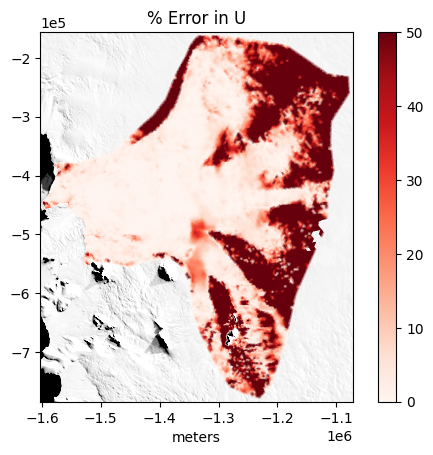

In [10]:
invert_thwaites.plot_u_error_percentage(u_optimized, vmax = 50)

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='UPS x [m]', ylabel='UPS y [m]'>)

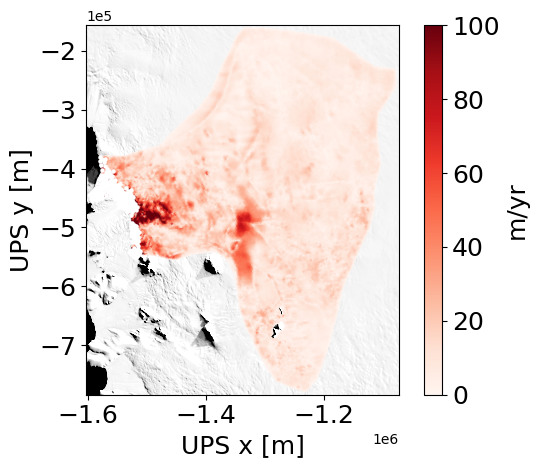

In [11]:
invert_thwaites.plot_u_error_no_sigma(u_optimized, vmax = 100)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='UPS x [m]'>)

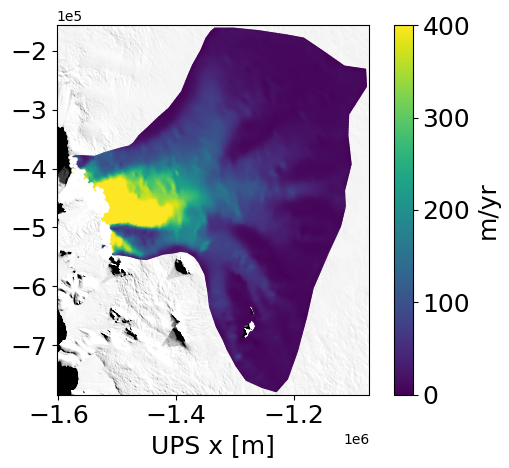

In [12]:
invert_thwaites.plot_u_mag(u_optimized, vmax = 400)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Surface velocity streamlines'}, xlabel='meters'>)

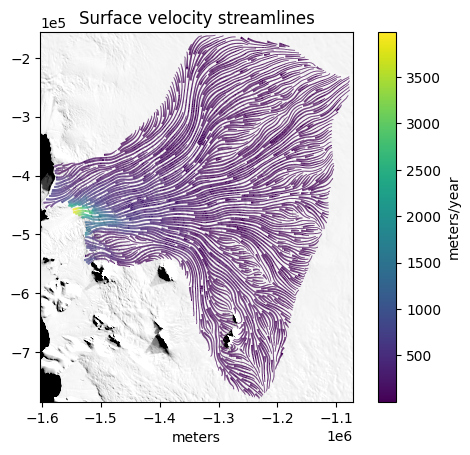

In [13]:
invert_thwaites.plot_streamline_u(u_optimized)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='UPS x [m]'>)

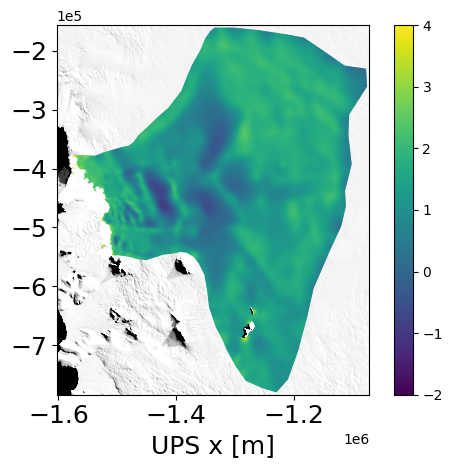

In [14]:
invert_thwaites.plot_C(vmin = -2, vmax=4, title = False)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$C_{b}$'}, xlabel='meters'>)

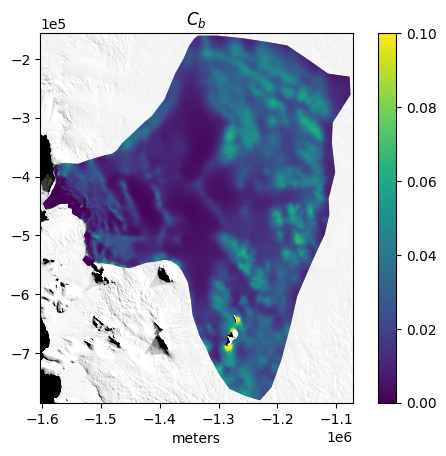

In [15]:
invert_thwaites.plot_C_total(vmax=0.1)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Grounding Line'}, xlabel='meters'>)

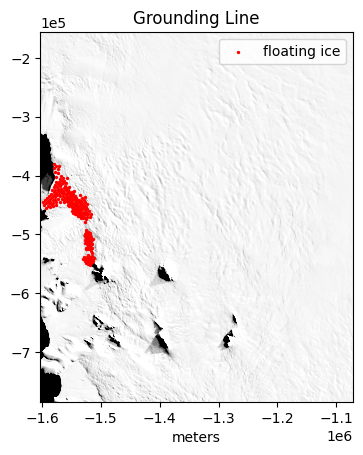

In [16]:
invert_thwaites.plot_grounding_line()

In [ ]:
#invert_thwaites.inverse_u = invert_thwaites.u_initial
invert_thwaites.inverse_u = u_optimized

In [ ]:
#theta = invert_thwaites.θ
C = invert_thwaites.C

In [18]:
df = invert_thwaites.get_dataframe(u_optimized)
df.to_csv('regularized_const_01C_C_only_englacial_temp_thwaites_r005_geo_12.csv')

In [17]:
def plot_u_mag_obj(obj, u, vmin=None, vmax=None, title=False):
    """Plot magnitude of velocity (standalone, pass class object as 'obj')"""
    fig, axes = obj.plot_bounded_antarctica()
    axes.set_xlabel("UPS x [m]", fontsize=18)
    axes.tick_params(axis='x', labelsize=18)
    axes.tick_params(axis='y', labelsize=18)

    colors = firedrake.tripcolor(
        u, axes=axes, vmin=vmin, vmax=vmax
    )

    # Overlay white dots over floating ice (no label)
    phi = obj.get_phi(obj.h, obj.s)
    Q_temp = firedrake.FunctionSpace(obj.mesh, family="CG", degree=1)
    line = firedrake.interpolate(phi, Q_temp)
    phi_values = line.dat.data[:]
    x = line.function_space().mesh().coordinates.dat.data[:, 0]
    y = line.function_space().mesh().coordinates.dat.data[:, 1]
    x_coords = x[(phi_values <= 0.1 + 0.01)]
    y_coords = y[(phi_values <= 0.1 + 0.01)]
    if len(x_coords) > 0:
        axes.scatter(x_coords, y_coords, color='white', s=7)

    if title:
        axes.set_title("$||V||$")

    cbar = fig.colorbar(colors)
    cbar.set_label("m/yr", fontsize=18)
    cbar.ax.tick_params(labelsize=18)

    return fig, axes

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='UPS x [m]'>)

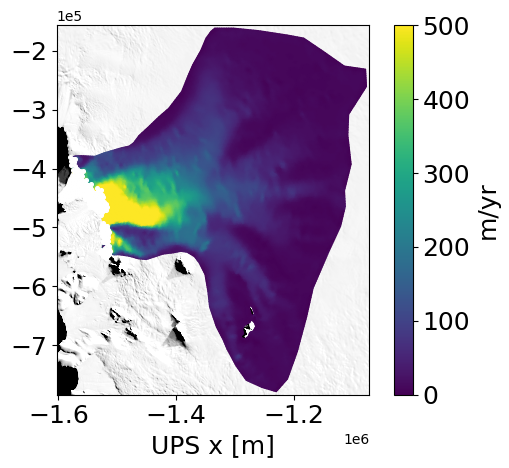

In [18]:
plot_u_mag_obj(invert_thwaites, u_optimized, vmin = 0, vmax = 500)

In [19]:
def plot_u_error_no_sigma_obj(obj, u, vmin=None, vmax=None, threshold=0.1, buffer=0.01, axes=None, title=False):
    """Plot error in u compared to u_initial (standalone version)."""
    # Plot on provided axes or create new if None
    if axes is None:
        fig, axes = obj.plot_bounded_antarctica()
    else:
        fig = None

    axes.set_xlabel("UPS x [m]", fontsize=18)
    axes.set_ylabel("UPS y [m]", fontsize=18)
    axes.tick_params(axis='x', labelsize=18)
    axes.tick_params(axis='y', labelsize=18)

    δu = firedrake.interpolate(firedrake.sqrt((u - obj.u_initial)**2), obj.Q)
    colors = firedrake.tripcolor(
        δu, vmin=vmin, vmax=vmax, cmap="Reds", axes=axes
    )

    φ = obj.get_phi(obj.h, obj.s)
    Q_temp = firedrake.FunctionSpace(obj.mesh, family="CG", degree=1)
    line = firedrake.interpolate(φ, Q_temp)

    phi_values = line.dat.data[:]
    x = line.function_space().mesh().coordinates.dat.data[:, 0]
    y = line.function_space().mesh().coordinates.dat.data[:, 1]

    x_coords = x[(phi_values <= threshold + buffer)]
    y_coords = y[(phi_values <= threshold + buffer)]

    if len(x_coords) > 0:
        axes.scatter(x_coords, y_coords, color='white', s=7)

    if fig is not None:
        cbar = fig.colorbar(colors)
        cbar.set_label("m/yr", fontsize=18)
        cbar.ax.tick_params(labelsize=18)

    if title:
        axes.set_title("Error in U")

    return fig, axes

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='UPS x [m]', ylabel='UPS y [m]'>)

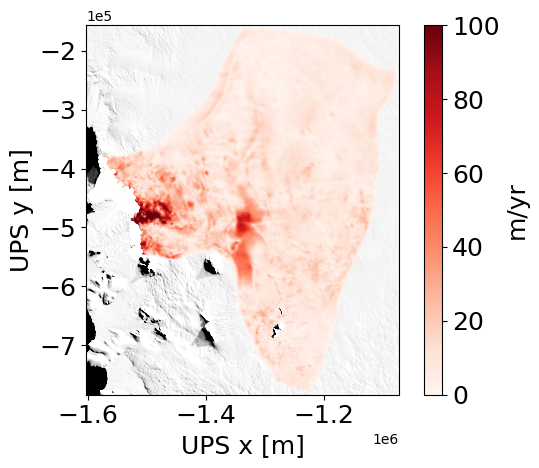

In [20]:
plot_u_error_no_sigma_obj(invert_thwaites, u_optimized, vmin = 0, vmax = 100)

In [21]:
def plot_C_obj(obj, vmin=-2, vmax=5, title=False):
    """Plot C (standalone version)."""
    fig, axes = obj.plot_bounded_antarctica()
    axes.set_xlabel("UPS x [m]", fontsize=18)
    axes.tick_params(axis='x', labelsize=18)
    axes.tick_params(axis='y', labelsize=18)

    colors = firedrake.tripcolor(obj.C, axes=axes)
    colors.set_clim(vmin, vmax)  # Set color limits on the ScalarMappable

    cbar = fig.colorbar(colors)
    #cbar.set_label("C", fontsize=18)
    cbar.ax.tick_params(labelsize=18)

    # Overlay white dots over floating ice (no label)
    phi = obj.get_phi(obj.h, obj.s)
    Q_temp = firedrake.FunctionSpace(obj.mesh, family="CG", degree=1)
    line = firedrake.interpolate(phi, Q_temp)
    phi_values = line.dat.data[:]
    x = line.function_space().mesh().coordinates.dat.data[:, 0]
    y = line.function_space().mesh().coordinates.dat.data[:, 1]
    x_coords = x[(phi_values <= 0.1 + 0.01)]
    y_coords = y[(phi_values <= 0.1 + 0.01)]
    if len(x_coords) > 0:
        axes.scatter(x_coords, y_coords, color='white', s=7)
    if title:
        axes.set_title("C")
    return fig, axes

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='UPS x [m]'>)

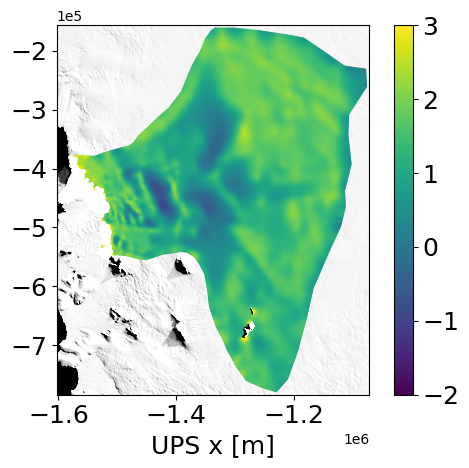

In [23]:
plot_C_obj(invert_thwaites, title = False, vmax =3 )

In [36]:
invert_thwaites.compute_C_ML_regress(filename = 'model_4_dotson2_thwaites1_r1_geo_static', half = False, flip = False, use_driving_stress = False, C_bounds = [-50, 55], θ_bounds =[-102, 200], number_of_models = 14)
u_optimized =  invert_thwaites.simulation()

/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


581/581 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [37]:
firedrake.assemble(invert_thwaites.loss_functional_nosigma(u_optimized))
# 120549.47831314373

433055.6327326819

In [38]:
df = invert_thwaites.get_dataframe(u_optimized)
df.to_csv('thwaites_ML_geo_4_static_2_1.csv')

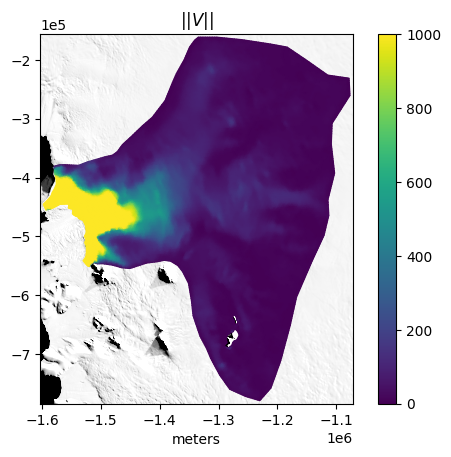

In [39]:
invert_thwaites.plot_u_mag(u_optimized, vmax = 1000)

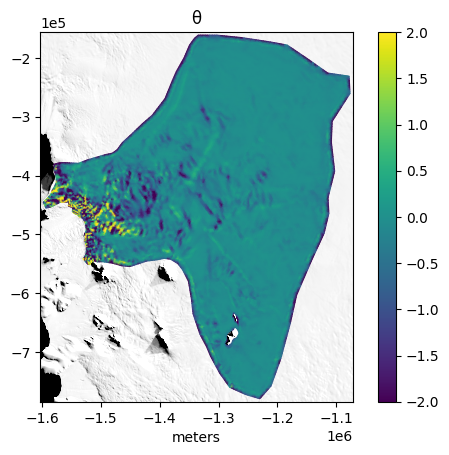

In [40]:
invert_thwaites.plot_theta(vmin = -2, vmax = 2)

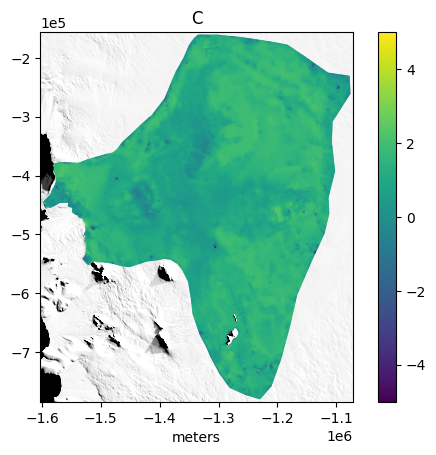

In [41]:
invert_thwaites.plot_C(vmin = -5, vmax = 5)

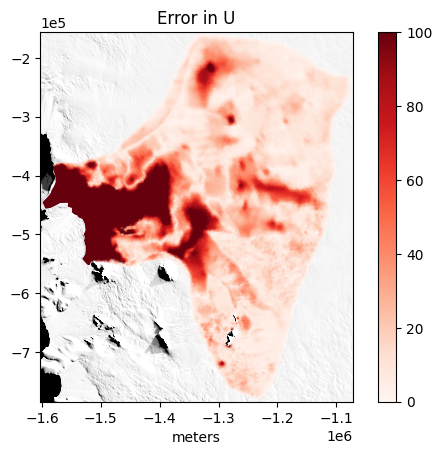

In [42]:
invert_thwaites.plot_u_error_no_sigma(u_optimized, vmax = 100)

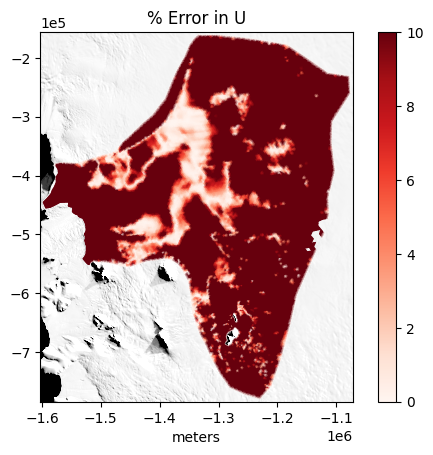

In [43]:
invert_thwaites.plot_u_error_percentage(u_optimized, vmax = 10)

In [44]:
invert_thwaites.ML_u = u_optimized

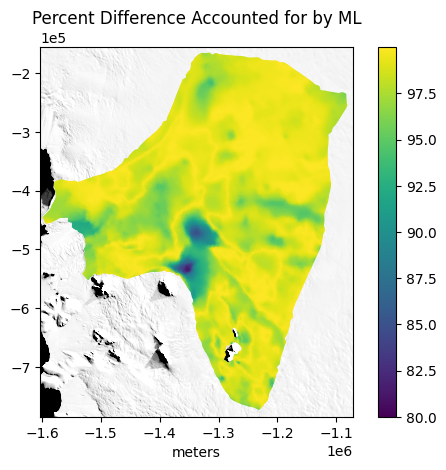

In [45]:
# Static2_1
invert_thwaites.plot_percent_accounted(vmin = 80)

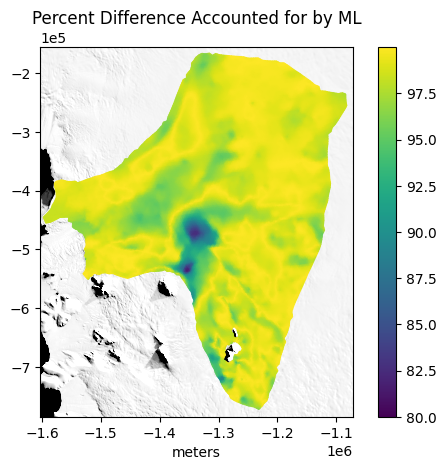

In [35]:
# Dynamic2_1
invert_thwaites.plot_percent_accounted(vmin = 80)

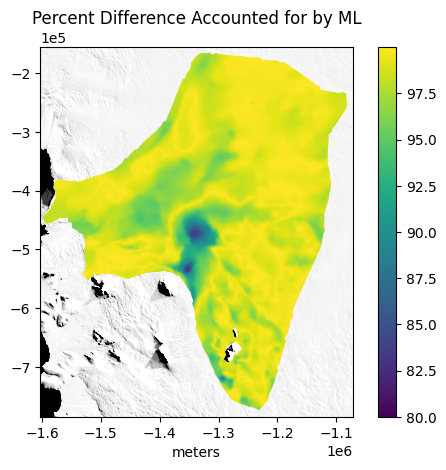

In [57]:
# Dynamic
invert_thwaites.plot_percent_accounted(vmin = 80)

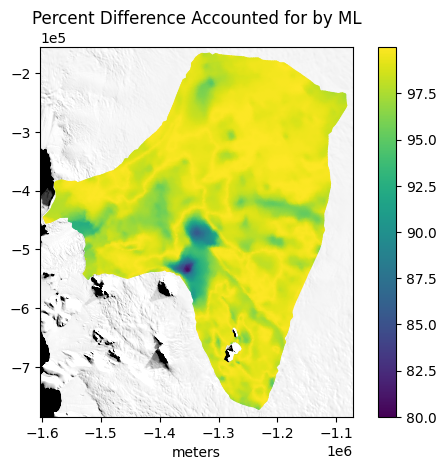

In [47]:
# Static
invert_thwaites.plot_percent_accounted(vmin = 80)